# Initialize

## Import Libraries

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style

style.use('fivethirtyeight')

## Import Data

In [2]:
df_orig = pd.read_csv("../data/fpl_fbref_season_player_history.csv")
df_orig.head()
df_orig.columns

,Unnamed: 0,season_year_ending,season,division,team,player_name,nationality,position,age,games,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,0,2022,2021-2022,Premier League,Arsenal,Bukayo Saka,ENG,"FW,MF",19.0,38,...,0.0,6.0,0.0,0.0,18.0,566.0,790.4,977.8,1434.0,320.0
1,1,2022,2021-2022,Premier League,Arsenal,Gabriel Dos Santos,BRA,DF,23.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2022,2021-2022,Premier League,Arsenal,Aaron Ramsdale,ENG,GK,23.0,34,...,0.0,1.0,0.0,90.0,14.0,641.0,690.2,1.0,0.0,69.0
3,3,2022,2021-2022,Premier League,Arsenal,Ben White,ENG,DF,23.0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2022,2021-2022,Premier League,Arsenal,Martin Ødegaard,NOR,MF,22.0,36,...,0.0,4.0,0.0,0.0,9.0,541.0,676.6,1073.2,639.0,238.2


Index(['Unnamed: 0', 'season_year_ending', 'season', 'division', 'team',
       'player_name', 'nationality', 'position', 'age', 'games',
       'games_starts', 'minutes_x', 'nbr_90s', 'goals', 'assists_x',
       'non_penalty_goals', 'penalties_successful', 'penalties_attempted',
       'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90',
       'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90',
       'xg', 'npxg', 'xa', 'npxg_xa', 'xg_per90', 'xa_per90', 'xg_xa_per90',
       'npxg_per90', 'npxg_xa_per90', 'Unnamed: 0_y', 'player_position',
       'first_name', 'second_name', 'element_code', 'start_cost', 'end_cost',
       'total_points', 'minutes_y', 'goals_scored', 'assists_y',
       'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved',
       'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus',
       'bps', 'influence', 'creativity', 'threat', 'ict_index'],
      dtype='object')

## Setup Columns

In [3]:
df_orig['start_cost'] = df_orig['start_cost'] / 10
df_orig['xg_per90_performance'] = df_orig['goals_per90'] - df_orig['xg_per90']
df_orig['value'] = df_orig['total_points'] / df_orig['start_cost']

cols_info = [
    'season_year_ending', 'player_name', 'player_position'
]
cols_response = ['total_points']
cols_numeric = [
    'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 
    'minutes_x', 'start_cost', 'clean_sheets', 'goals_conceded', 'goals', 'assists_x', 
    'goals_per90', 'assists_per90', 'xg_per90', 'xa_per90', 'npxg_per90', 'npxg_xa_per90',
    'value', 'xg_per90_performance'
]
df = df_orig[cols_info + cols_response + cols_numeric]
df.head(10)

,season_year_ending,player_name,player_position,total_points,bonus,bps,influence,creativity,threat,ict_index,...,goals,assists_x,goals_per90,assists_per90,xg_per90,xa_per90,npxg_per90,npxg_xa_per90,value,xg_per90_performance
0,2022,Bukayo Saka,MF,179.0,18.0,566.0,790.4,977.8,1434.0,320.0,...,11.0,7.0,0.33,0.21,0.29,0.21,0.25,0.46,27.538462,0.04
1,2022,Gabriel Dos Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,0.15,0.00,0.08,0.02,0.08,0.10,NaN,0.07
2,2022,Aaron Ramsdale,GK,135.0,14.0,641.0,690.2,1.0,0.0,69.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30.000000,0.00
3,2022,Ben White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,0.00,0.03,0.02,0.03,0.05,NaN,-0.03
4,2022,Martin Ødegaard,MF,131.0,9.0,541.0,676.6,1073.2,639.0,238.2,...,7.0,4.0,0.23,0.13,0.16,0.22,0.16,0.38,23.818182,0.07
5,2022,Granit Xhaka,MF,60.0,3.0,334.0,395.4,522.9,262.0,118.2,...,1.0,2.0,0.04,0.08,0.05,0.09,0.05,0.14,12.000000,-0.01
6,2022,Thomas Partey,MF,71.0,4.0,345.0,359.6,275.5,394.0,103.0,...,2.0,1.0,0.09,0.04,0.11,0.06,0.11,0.17,14.200000,-0.02
7,2022,Kieran Tierney,DF,106.0,11.0,454.0,365.2,335.9,198.0,90.1,...,1.0,3.0,0.05,0.14,0.03,0.09,0.03,0.12,21.200000,0.02
8,2022,Emile Smith Rowe,MF,125.0,9.0,435.0,555.8,453.3,576.0,158.4,...,10.0,2.0,0.47,0.09,0.27,0.10,0.27,0.37,22.727273,0.20
9,2022,Martinelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,0.29,0.29,0.35,0.16,0.31,0.47,NaN,-0.06


# 2021-22 Analysis

## Filter for Last Season (2021-22)

In [4]:
df22 = df[cols_info + cols_response + cols_numeric][(df['season_year_ending'] == 2022)] # & (df['total_points'].notna())]
df22.shape
df22.head()

(690, 24)

,season_year_ending,player_name,player_position,total_points,bonus,bps,influence,creativity,threat,ict_index,...,goals,assists_x,goals_per90,assists_per90,xg_per90,xa_per90,npxg_per90,npxg_xa_per90,value,xg_per90_performance
0,2022,Bukayo Saka,MF,179.0,18.0,566.0,790.4,977.8,1434.0,320.0,...,11.0,7.0,0.33,0.21,0.29,0.21,0.25,0.46,27.538462,0.04
1,2022,Gabriel Dos Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,0.15,0.00,0.08,0.02,0.08,0.10,NaN,0.07
2,2022,Aaron Ramsdale,GK,135.0,14.0,641.0,690.2,1.0,0.0,69.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30.000000,0.00
3,2022,Ben White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,0.00,0.03,0.02,0.03,0.05,NaN,-0.03
4,2022,Martin Ødegaard,MF,131.0,9.0,541.0,676.6,1073.2,639.0,238.2,...,7.0,4.0,0.23,0.13,0.16,0.22,0.16,0.38,23.818182,0.07


## Correlation Matrix

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap for numerical Variables')

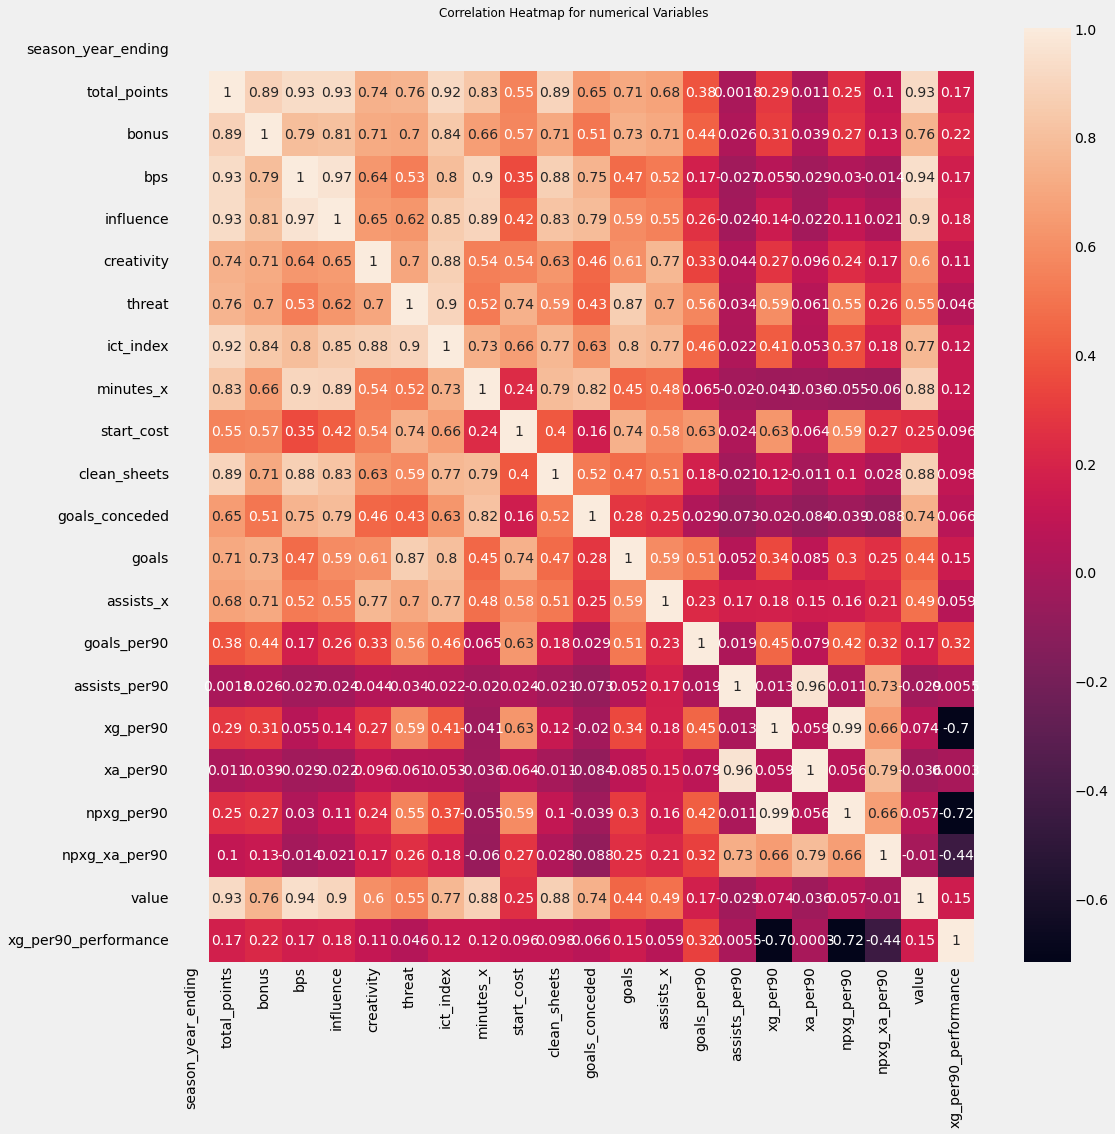

In [5]:
plt.figure(figsize=(16, 16))
sns.heatmap(df22.corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12)

## Pair Plot

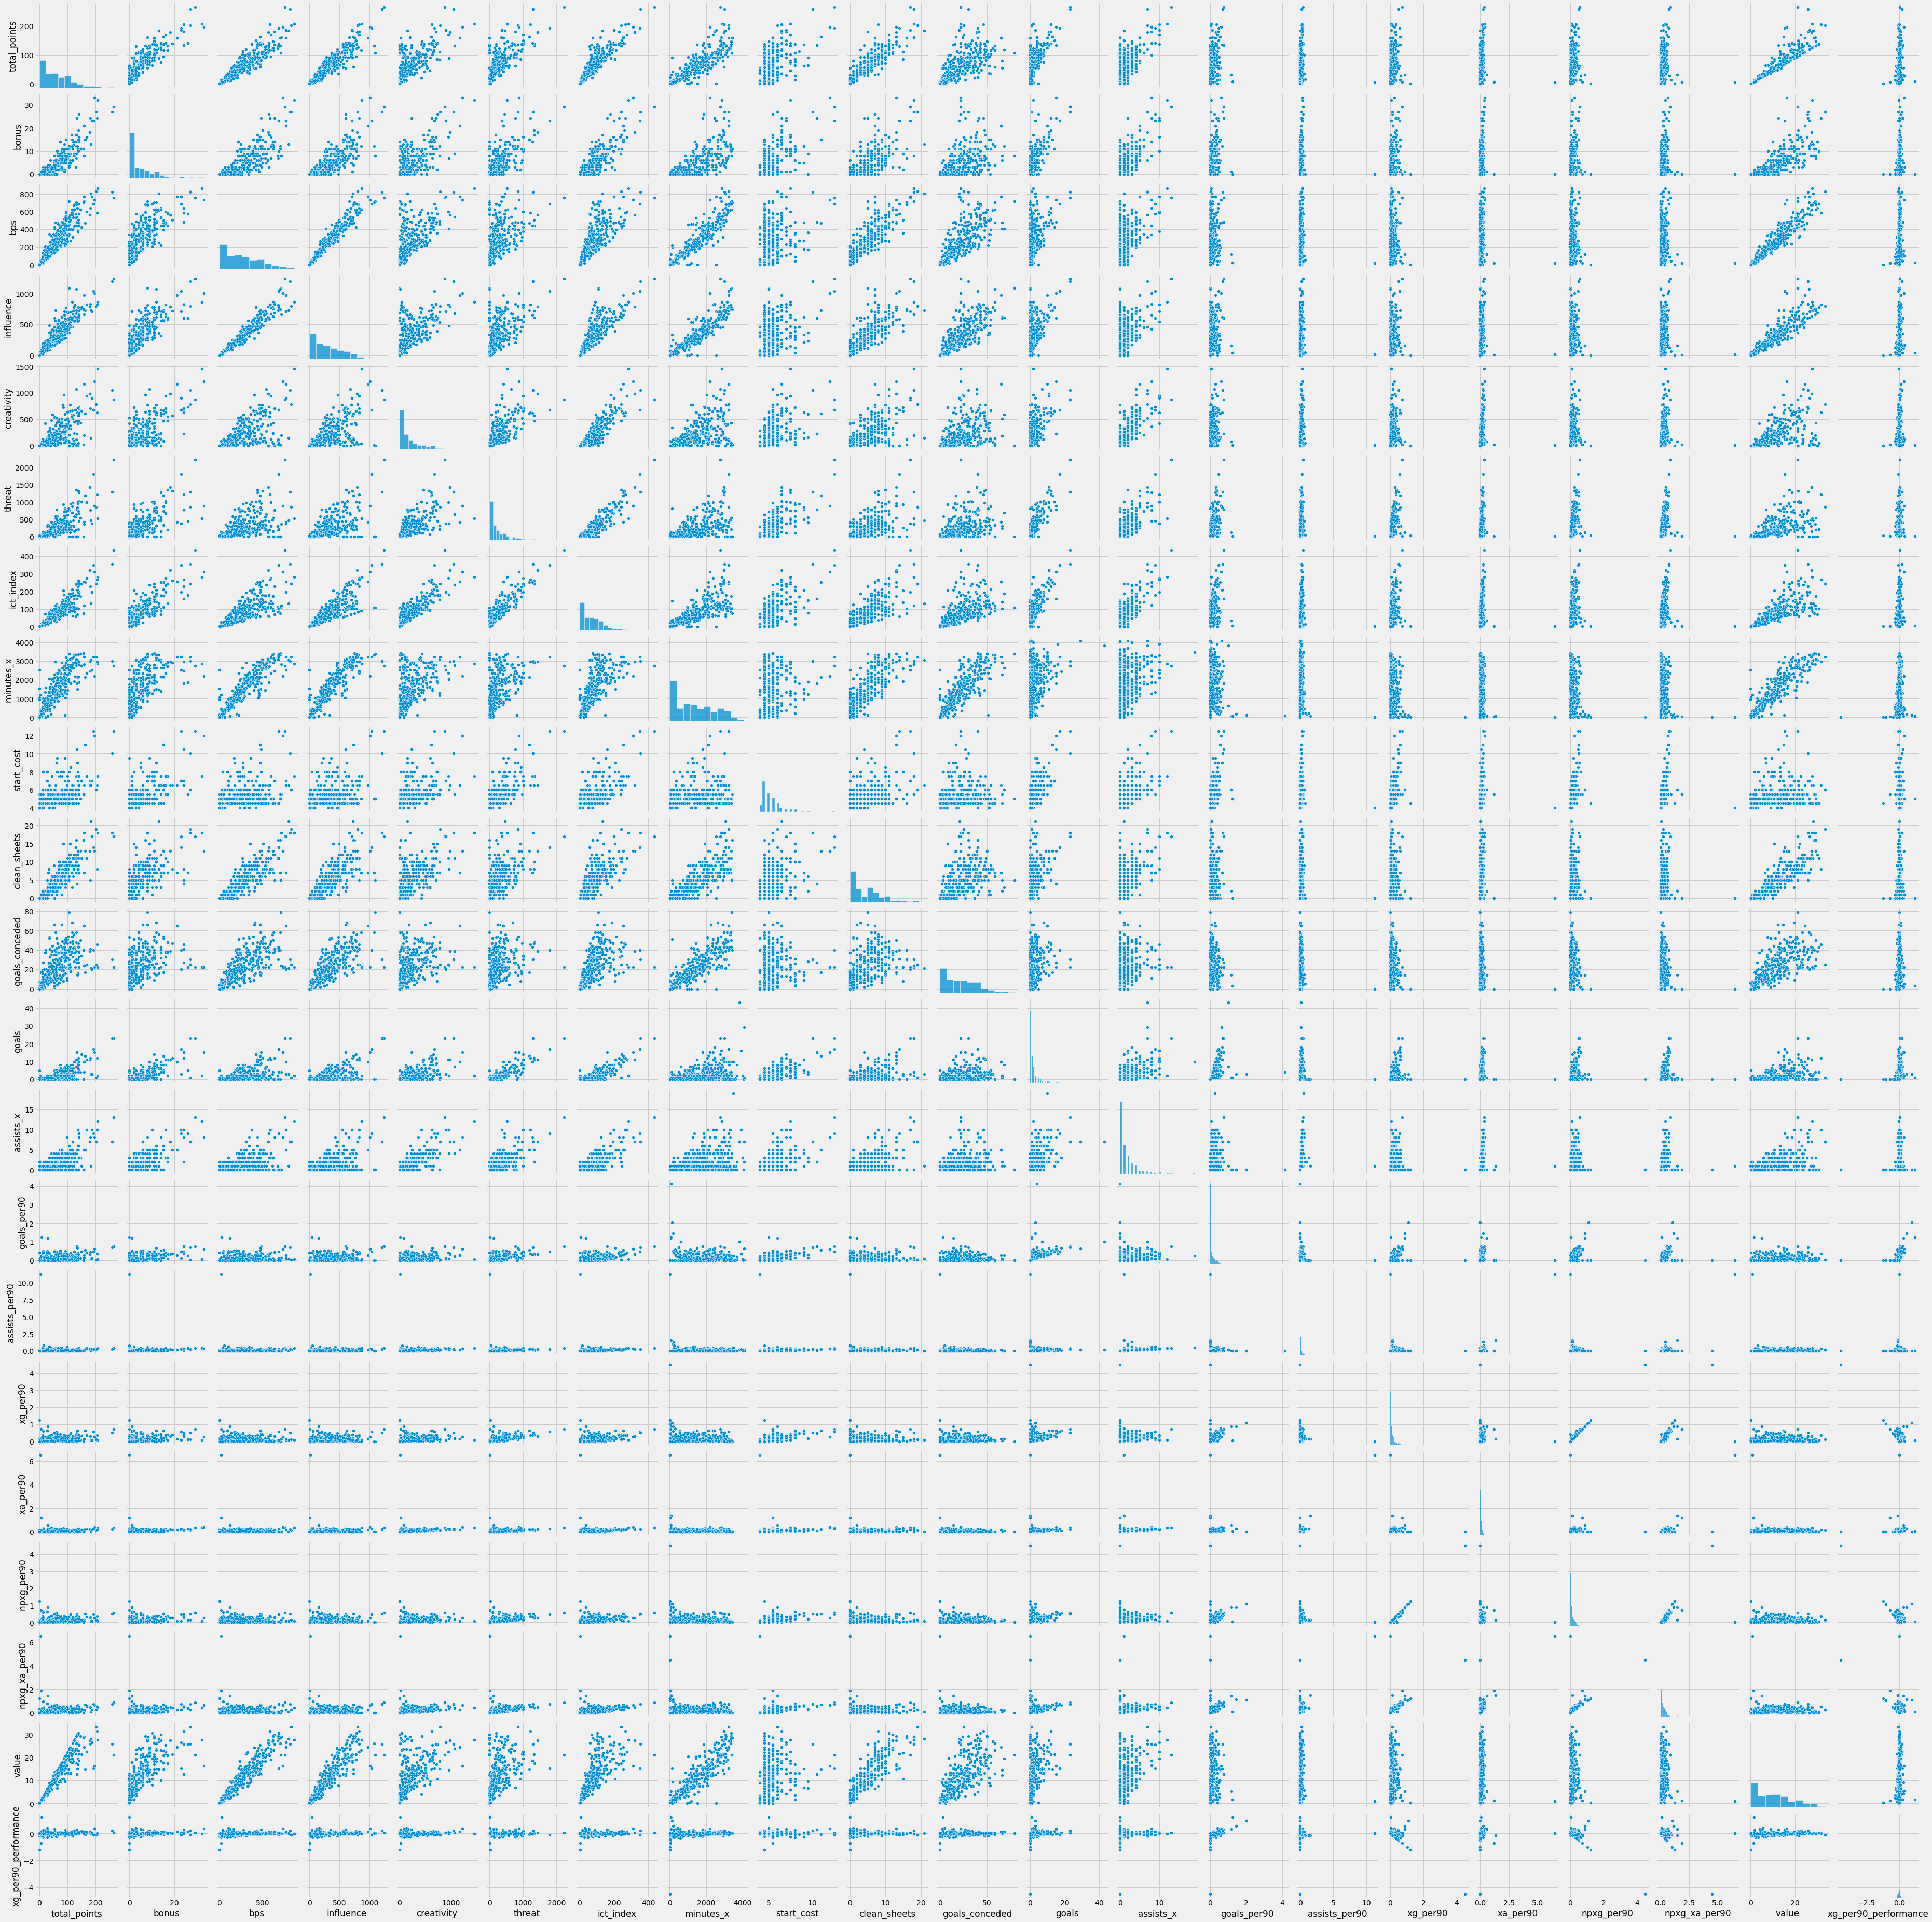

In [6]:
sns.pairplot(df22[cols_response + cols_numeric])
plt.show()

## Points vs BPS Scatterplot

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='bps'>

Text(179.3, 566.3, 'Bukayo Saka')

Text(169.3, 597.3, 'Mason Mount')

Text(150.3, 422.3, 'Wilfried Zaha')

Text(181.3, 637.3, 'James Maddison')

Text(183.3, 803.3, 'Virgil van Dijk')

Text(208.3, 864.3, 'Trent Alexander-Arnold')

Text(265.3, 756.3, 'Mohamed Salah')

Text(186.3, 770.3, 'Andrew Robertson')

Text(201.3, 829.3, 'João Cancelo')

Text(160.3, 714.3, 'Aymeric Laporte')

Text(196.3, 732.3, 'Kevin De Bruyne')

Text(163.3, 468.3, 'Raheem Sterling')

Text(159.3, 769.3, 'James Ward-Prowse')

Text(158.3, 703.3, 'Hugo Lloris')

Text(192.3, 684.3, 'Harry Kane')

Text(258.3, 819.3, 'Son Heung-min')

Text(206.3, 586.3, 'Jarrod Bowen')

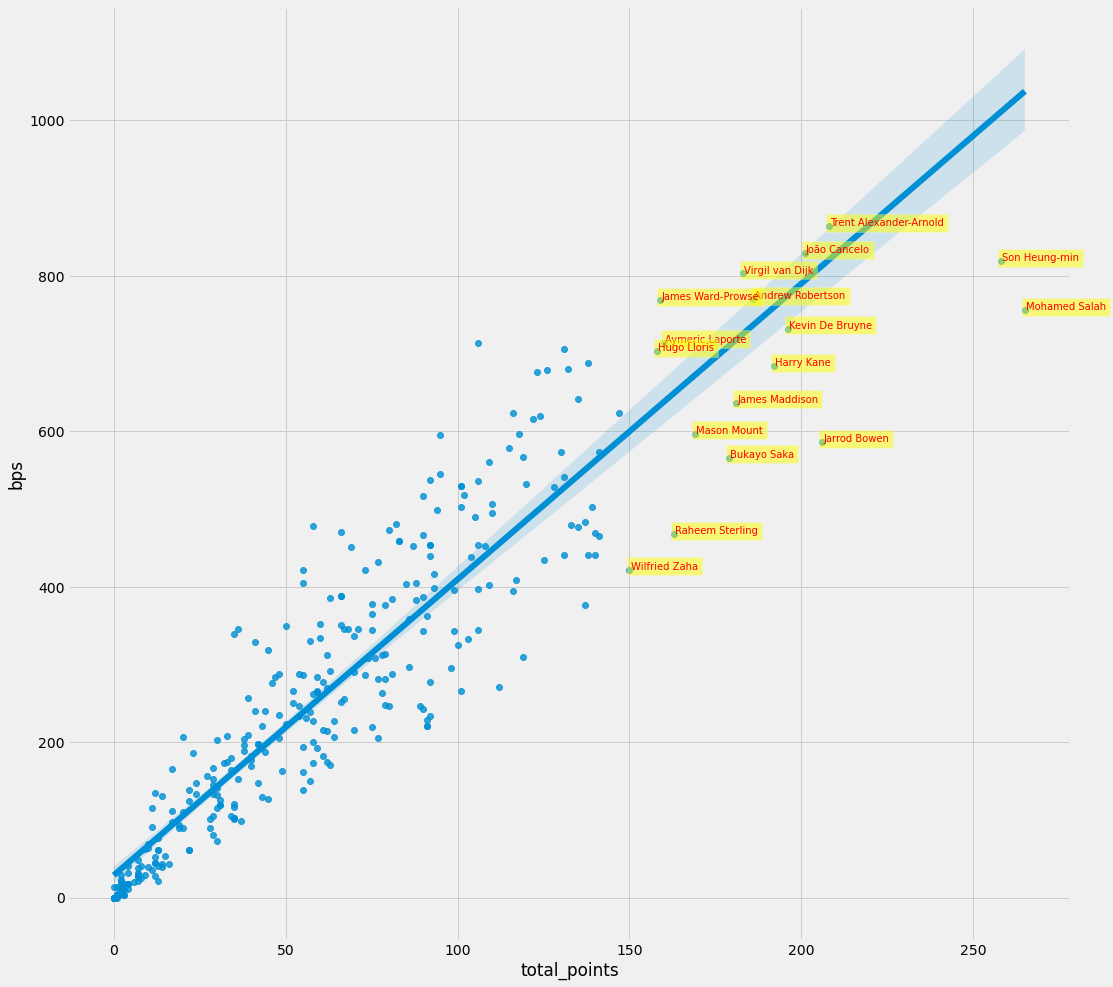

In [7]:
plt.figure(figsize=(16, 16))
sns.regplot(x='total_points', y='bps', data=df22)
for i in range(len(df22)):
    if (df22.total_points[i] >= 150):
        plt.text(x=df22.total_points[i]+0.3, y=df22.bps[i]+0.3, s=df22.player_name[i],
                fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))

## Points vs Cost Scatterplot

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:xlabel='total_points', ylabel='start_cost'>

Text(179.1, 6.6, 'Bukayo Saka')

Text(169.1, 7.6, 'Mason Mount')

Text(150.1, 7.1, 'Wilfried Zaha')

Text(181.1, 7.1, 'James Maddison')

Text(183.1, 6.6, 'Virgil van Dijk')

Text(208.1, 7.6, 'Trent Alexander-Arnold')

Text(265.1, 12.6, 'Mohamed Salah')

Text(186.1, 7.1, 'Andrew Robertson')

Text(201.1, 6.1, 'João Cancelo')

Text(160.1, 5.6, 'Aymeric Laporte')

Text(196.1, 12.1, 'Kevin De Bruyne')

Text(163.1, 11.1, 'Raheem Sterling')

Text(159.1, 6.6, 'James Ward-Prowse')

Text(158.1, 5.6, 'Hugo Lloris')

Text(192.1, 12.6, 'Harry Kane')

Text(258.1, 10.1, 'Son Heung-min')

Text(206.1, 6.6, 'Jarrod Bowen')

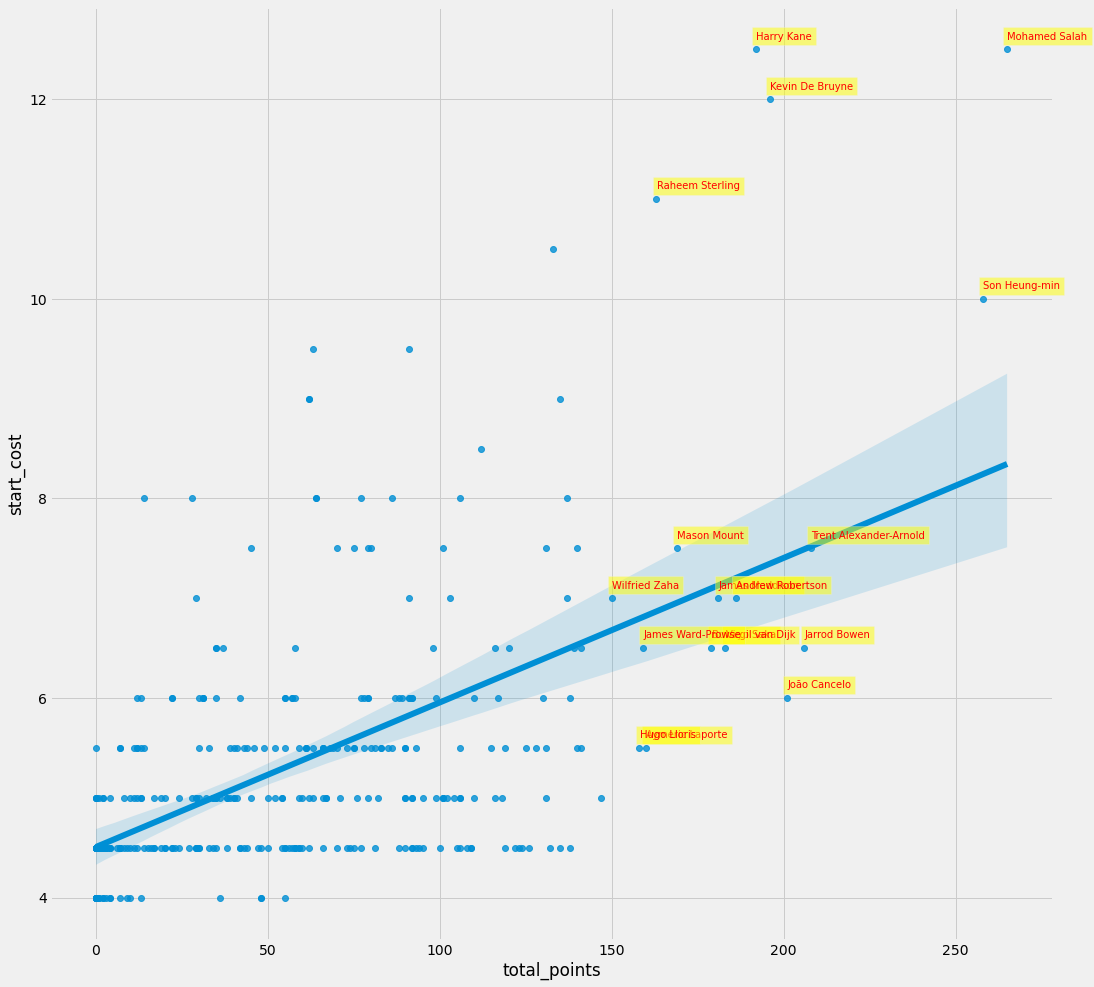

In [8]:
pred = 'start_cost'
plt.figure(figsize=(16, 16))
sns.regplot(x='total_points', y=pred, data=df22)
for i in range(len(df22)):
    if (df22.total_points[i] >= 150):
        plt.text(x=df22.total_points[i]+0.1, y=df22[pred][i]+0.1, s=df22.player_name[i],
                fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))


## Filter Top 40 Performers by 'Value'

In [9]:
df22_val_cols = ['player_name', 'player_position', 'total_points', 'start_cost', 'value', 'minutes_x', 'bps', 'ict_index', 'clean_sheets', 'goals_conceded', 'goals', 'assists_x', 'goals_per90', 'xg_per90', 'xg_per90_performance']
df22_val = df22[df22_val_cols].sort_values(by='value', ascending=False).head(40)
df22_val.sort_values(by=['player_position', 'total_points'], ascending=[True, False])

,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
394,Andrew Robertson,DF,186.0,7.0,26.571429,2537.0,770.0,198.3,17.0,20.0,3.0,10.0,0.11,0.07,0.04
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
198,Reece James,DF,141.0,5.5,25.636364,1864.0,573.0,178.0,7.0,22.0,5.0,9.0,0.24,0.12,0.12
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03
196,Marcos Alonso,DF,128.0,5.5,23.272727,2167.0,528.0,180.6,9.0,22.0,4.0,4.0,0.17,0.14,0.03


## Best Performers by Position (2021-22)

In [10]:
df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='total_points', ascending=False).head(10)
df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='total_points', ascending=False).head(10)

/tmp/ipykernel_14607/409152607.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
590,Hugo Lloris,GK,158.0,5.5,28.727273,3420.0,703.0,76.9,16.0,40.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Ramsdale,GK,135.0,4.5,30.000000,3060.0,641.0,69.0,12.0,39.0,0.0,0.0,0.0,0.0,0.0
355,Kasper Schmeichel,GK,131.0,5.0,26.200000,3330.0,706.0,109.1,7.0,58.0,0.0,0.0,0.0,0.0,0.0
191,Edouard Mendy,GK,130.0,6.0,21.666667,3060.0,573.0,58.2,14.0,31.0,0.0,0.0,0.0,0.0,0.0
156,Robert Sánchez,GK,126.0,4.5,28.000000,3329.0,679.0,84.0,11.0,42.0,0.0,0.0,0.0,0.0,0.0
227,Vicente Guaita,GK,119.0,4.5,26.444444,2655.0,567.0,61.4,11.0,33.0,0.0,0.0,0.0,0.0,0.0
252,Jordan Pickford,GK,116.0,5.0,23.200000,3150.0,624.0,90.5,7.0,58.0,0.0,0.0,0.0,0.0,0.0
323,Illan Meslier,GK,106.0,5.0,21.200000,3384.0,713.0,108.9,5.0,79.0,0.0,0.0,0.0,0.0,0.0
571,Fraser Forster,GK,57.0,4.5,12.666667,1710.0,330.0,56.2,3.0,35.0,0.0,0.0,0.0,0.0,0.0
573,Alex McCarthy,GK,55.0,4.5,12.222222,1530.0,286.0,34.5,5.0,27.0,0.0,0.0,0.0,0.0,0.0


/tmp/ipykernel_14607/409152607.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
394,Andrew Robertson,DF,186.0,7.0,26.571429,2537.0,770.0,198.3,17.0,20.0,3.0,10.0,0.11,0.07,0.04
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
198,Reece James,DF,141.0,5.5,25.636364,1864.0,573.0,178.0,7.0,22.0,5.0,9.0,0.24,0.12,0.12
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03
196,Marcos Alonso,DF,128.0,5.5,23.272727,2167.0,528.0,180.6,9.0,22.0,4.0,4.0,0.17,0.14,0.03


/tmp/ipykernel_14607/409152607.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
392,Mohamed Salah,MF,265.0,12.5,21.200000,2762.0,756.0,434.8,17.0,22.0,23.0,13.0,0.75,0.71,0.04
594,Son Heung-min,MF,258.0,10.0,25.800000,3006.0,819.0,355.4,18.0,30.0,23.0,7.0,0.69,0.49,0.20
629,Jarrod Bowen,MF,206.0,6.5,31.692308,2983.0,586.0,267.4,8.0,46.0,12.0,10.0,0.36,0.34,0.02
428,Kevin De Bruyne,MF,196.0,12.0,16.333333,2201.0,732.0,311.0,13.0,22.0,15.0,8.0,0.61,0.26,0.35
358,James Maddison,MF,181.0,7.0,25.857143,2459.0,637.0,230.2,5.0,41.0,12.0,8.0,0.44,0.30,0.14
0,Bukayo Saka,MF,179.0,6.5,27.538462,2978.0,566.0,320.0,13.0,39.0,11.0,7.0,0.33,0.29,0.04
194,Mason Mount,MF,169.0,7.5,22.533333,2363.0,597.0,276.3,11.0,25.0,11.0,10.0,0.42,0.34,0.08
430,Raheem Sterling,MF,163.0,11.0,14.818182,2128.0,468.0,253.4,13.0,17.0,13.0,5.0,0.55,0.61,-0.06
561,James Ward-Prowse,MF,159.0,6.5,24.461538,3215.0,769.0,255.5,7.0,65.0,10.0,5.0,0.28,0.15,0.13
226,Wilfried Zaha,MF,150.0,7.0,21.428571,2760.0,422.0,243.8,11.0,34.0,14.0,1.0,0.46,0.31,0.15


/tmp/ipykernel_14607/409152607.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='total_points', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
591,Harry Kane,FW,192.0,12.5,15.360000,3232.0,684.0,350.4,14.0,40.0,17.0,9.0,0.47,0.56,-0.09
630,Michail Antonio,FW,140.0,7.5,18.666667,2971.0,441.0,252.7,7.0,43.0,10.0,8.0,0.30,0.34,-0.04
124,Ivan Toney,FW,139.0,6.5,21.384615,2909.0,502.0,260.7,8.0,47.0,12.0,5.0,0.37,0.37,0.00
364,Jamie Vardy,FW,133.0,10.5,12.666667,1806.0,480.0,159.6,4.0,27.0,15.0,2.0,0.75,0.47,0.28
45,Ollie Watkins,FW,131.0,7.5,17.466667,2952.0,441.0,242.9,10.0,48.0,11.0,2.0,0.34,0.37,-0.03
122,Bryan Mbeumo,FW,119.0,5.5,21.636364,2905.0,310.0,193.7,9.0,47.0,4.0,7.0,0.12,0.30,-0.18
199,Kai Havertz,FW,112.0,8.5,13.176471,1809.0,271.0,171.9,10.0,18.0,8.0,3.0,0.40,0.48,-0.08
50,Danny Ings,FW,106.0,8.0,13.250000,1898.0,344.0,140.3,10.0,26.0,7.0,6.0,0.33,0.35,-0.02
568,Che Adams,FW,103.0,7.0,14.714286,2039.0,333.0,156.8,5.0,40.0,7.0,3.0,0.31,0.31,0.00
663,Raúl Jiménez,FW,101.0,7.5,13.466667,2631.0,266.0,171.2,11.0,32.0,6.0,4.0,0.21,0.23,-0.02


## Best Value by Position (2021-22)

In [11]:
df22_gk = df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='value', ascending=False).head(10)
df22_df = df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='value', ascending=False).head(10)
df22_mf = df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='value', ascending=False).head(10)
df22_fw = df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='value', ascending=False).head(10)
df22_gk.sort_values(by='total_points', ascending=False)
df22_df.sort_values(by='total_points', ascending=False)
df22_mf.sort_values(by='total_points', ascending=False)
df22_fw.sort_values(by='total_points', ascending=False)

/tmp/ipykernel_14607/2171168699.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_gk = df22[df22_val_cols][df['player_position']=='GK'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_df = df22[df22_val_cols][df['player_position']=='DF'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_mf = df22[df22_val_cols][df['player_position']=='MF'].sort_values(by='value', ascending=False).head(10)
/tmp/ipykernel_14607/2171168699.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_fw = df22[df22_val_cols][df['player_position']=='FW'].sort_values(by='value', ascending=False).head(10)


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
590,Hugo Lloris,GK,158.0,5.5,28.727273,3420.0,703.0,76.9,16.0,40.0,0.0,0.0,0.0,0.0,0.0
2,Aaron Ramsdale,GK,135.0,4.5,30.000000,3060.0,641.0,69.0,12.0,39.0,0.0,0.0,0.0,0.0,0.0
355,Kasper Schmeichel,GK,131.0,5.0,26.200000,3330.0,706.0,109.1,7.0,58.0,0.0,0.0,0.0,0.0,0.0
191,Edouard Mendy,GK,130.0,6.0,21.666667,3060.0,573.0,58.2,14.0,31.0,0.0,0.0,0.0,0.0,0.0
156,Robert Sánchez,GK,126.0,4.5,28.000000,3329.0,679.0,84.0,11.0,42.0,0.0,0.0,0.0,0.0,0.0
227,Vicente Guaita,GK,119.0,4.5,26.444444,2655.0,567.0,61.4,11.0,33.0,0.0,0.0,0.0,0.0,0.0
252,Jordan Pickford,GK,116.0,5.0,23.200000,3150.0,624.0,90.5,7.0,58.0,0.0,0.0,0.0,0.0,0.0
323,Illan Meslier,GK,106.0,5.0,21.200000,3384.0,713.0,108.9,5.0,79.0,0.0,0.0,0.0,0.0,0.0
571,Fraser Forster,GK,57.0,4.5,12.666667,1710.0,330.0,56.2,3.0,35.0,0.0,0.0,0.0,0.0,0.0
573,Alex McCarthy,GK,55.0,4.5,12.222222,1530.0,286.0,34.5,5.0,27.0,0.0,0.0,0.0,0.0,0.0


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
389,Trent Alexander-Arnold,DF,208.0,7.5,27.733333,2853.0,864.0,283.2,18.0,22.0,2.0,12.0,0.06,0.08,-0.02
423,João Cancelo,DF,201.0,6.0,33.500000,3227.0,829.0,243.6,19.0,25.0,1.0,7.0,0.03,0.12,-0.09
388,Virgil van Dijk,DF,183.0,6.5,28.153846,3060.0,803.0,133.1,21.0,21.0,3.0,1.0,0.09,0.07,0.02
426,Aymeric Laporte,DF,160.0,5.5,29.090909,2828.0,714.0,120.7,18.0,24.0,4.0,0.0,0.13,0.14,-0.01
41,Matty Cash,DF,147.0,5.0,29.400000,3377.0,623.0,172.1,13.0,50.0,4.0,3.0,0.11,0.07,0.04
657,Conor Coady,DF,138.0,4.5,30.666667,3361.0,688.0,103.2,11.0,43.0,4.0,0.0,0.11,0.05,0.06
593,Eric Dier,DF,132.0,4.5,29.333333,3071.0,680.0,104.0,16.0,30.0,0.0,0.0,0.00,0.03,-0.03
225,Joachim Andersen,DF,124.0,4.5,27.555556,2916.0,619.0,100.7,12.0,37.0,0.0,3.0,0.00,0.02,-0.02
222,Marc Guéhi,DF,123.0,4.5,27.333333,3222.0,676.0,111.1,11.0,43.0,2.0,1.0,0.06,0.05,0.01
120,Pontus Jansson,DF,122.0,4.5,27.111111,3321.0,616.0,133.0,8.0,56.0,3.0,1.0,0.08,0.08,0.00


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
594,Son Heung-min,MF,258.0,10.0,25.800000,3006.0,819.0,355.4,18.0,30.0,23.0,7.0,0.69,0.49,0.20
629,Jarrod Bowen,MF,206.0,6.5,31.692308,2983.0,586.0,267.4,8.0,46.0,12.0,10.0,0.36,0.34,0.02
358,James Maddison,MF,181.0,7.0,25.857143,2459.0,637.0,230.2,5.0,41.0,12.0,8.0,0.44,0.30,0.14
0,Bukayo Saka,MF,179.0,6.5,27.538462,2978.0,566.0,320.0,13.0,39.0,11.0,7.0,0.33,0.29,0.04
561,James Ward-Prowse,MF,159.0,6.5,24.461538,3215.0,769.0,255.5,7.0,65.0,10.0,5.0,0.28,0.15,0.13
224,Conor Gallagher,MF,140.0,5.5,25.454545,2845.0,469.0,197.9,11.0,38.0,8.0,3.0,0.25,0.18,0.07
634,Saïd Benrahma,MF,138.0,6.0,23.000000,2168.0,441.0,177.6,9.0,27.0,8.0,6.0,0.33,0.21,0.12
4,Martin Ødegaard,MF,131.0,5.5,23.818182,2785.0,541.0,238.2,11.0,39.0,7.0,4.0,0.23,0.16,0.07
8,Emile Smith Rowe,MF,125.0,5.5,22.727273,1921.0,435.0,158.4,8.0,28.0,10.0,2.0,0.47,0.27,0.20
48,Jacob Ramsey,MF,109.0,4.5,24.222222,2467.0,402.0,130.7,12.0,35.0,6.0,1.0,0.22,0.14,0.08


,player_name,player_position,total_points,start_cost,value,minutes_x,bps,ict_index,clean_sheets,goals_conceded,goals,assists_x,goals_per90,xg_per90,xg_per90_performance
591,Harry Kane,FW,192.0,12.5,15.360000,3232.0,684.0,350.4,14.0,40.0,17.0,9.0,0.47,0.56,-0.09
630,Michail Antonio,FW,140.0,7.5,18.666667,2971.0,441.0,252.7,7.0,43.0,10.0,8.0,0.30,0.34,-0.04
124,Ivan Toney,FW,139.0,6.5,21.384615,2909.0,502.0,260.7,8.0,47.0,12.0,5.0,0.37,0.37,0.00
45,Ollie Watkins,FW,131.0,7.5,17.466667,2952.0,441.0,242.9,10.0,48.0,11.0,2.0,0.34,0.37,-0.03
122,Bryan Mbeumo,FW,119.0,5.5,21.636364,2905.0,310.0,193.7,9.0,47.0,4.0,7.0,0.12,0.30,-0.18
568,Che Adams,FW,103.0,7.0,14.714286,2039.0,333.0,156.8,5.0,40.0,7.0,3.0,0.31,0.31,0.00
663,Raúl Jiménez,FW,101.0,7.5,13.466667,2631.0,266.0,171.2,11.0,32.0,6.0,4.0,0.21,0.23,-0.02
161,Neal Maupay,FW,98.0,6.5,15.076923,2276.0,295.0,143.5,7.0,31.0,8.0,2.0,0.32,0.30,0.02
569,Armando Broja,FW,92.0,5.0,18.400000,1975.0,234.0,115.6,5.0,37.0,6.0,0.0,0.27,0.32,-0.05
170,Danny Welbeck,FW,89.0,6.0,14.833333,1478.0,247.0,117.8,5.0,16.0,6.0,2.0,0.37,0.37,0.00


In [12]:
print(df22_val.describe())

       total_points  start_cost      value    minutes_x         bps  \
count     40.000000   40.000000  40.000000    40.000000   40.000000   
mean     142.975000    5.537500  25.824100  2847.025000  599.525000   
std       34.706452    1.173355   3.018321   406.127521  132.231147   
min      100.000000    4.500000  21.636364  1864.000000  310.000000   
25%      119.000000    4.500000  23.318182  2582.250000  522.750000   
50%      131.500000    5.500000  25.718182  2910.500000  596.500000   
75%      159.250000    6.125000  27.800000  3159.750000  682.000000   
max      258.000000   10.000000  33.500000  3420.000000  864.000000   

        ict_index  clean_sheets  goals_conceded      goals  assists_x  \
count   40.000000     40.000000        40.00000  40.000000  40.000000   
mean   161.340000     11.625000        36.47500   4.425000   3.425000   
std     75.929558      3.854318        11.49356   4.872147   3.565414   
min     58.200000      5.000000        20.00000   0.000000   0.00000